# Application of Generative Adversial Networks to Image Datasets

#### Kacey Schulz, Max Rosoff, Ben Gillett

## Introduction

In this assignment, we will test three generative adversarial networks (GAN) against threee sets of images. Each images set has different characteristics, as does each GAN. Our goal was to develop a better understanding of GANs and how they work because the adversarial machine learning model is highly interesting and adversarial networks are relevant to more than just image generation. Furthermore, we wanted to explore more unsupervices learning models since they were not covered in much depth during the class.

In our original project proposal, we claimed to plan to connect our machine learning model to a javascript web application for easy interaction. We decided against this in favor of further exploration of GAN models. There are many variations of generative adversarial models and they have been improved in many ways since their invention in 2014. As a result, we thought it would be a more enriching learning opportunity to explore the improved GANs and the strategies that researchers have employed to improve these GANs.

## Methods and Results

GANs were first invented and described [Goodfellow et al](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) in 2014. They employ two networks which work against each other- a generator and a discriminator. 

The generator takes a vector and from it produces a complete image. The generator's adversary is a discriminator- a network that estimates the probability that an image is true data vs. generated data. 

The generator's input vector is similar to the feature vector of an autoencoder- a low dimensionality representation of a high dimensionality image. The generator, then, is the reconstruction side of the autoencoder. The ideas are, in fact, so related that there has been research on adversarial autoencoders based on GANs. However, in a GAN, the training is based on optimizing different losses. Despite this, many conclusions can be drawn from GANs due to this observation. If the input vector to the generator has low dimensionality, then the images the generator produces will be based on a more constrained set of features of the training data. However, because the transformation from the feature space to the image space can be a highly complex non-affine function, it is possible to get decent quality 64x64x3 images from a input vector with dimensionality as small as a 100.

During training, the discriminator minimizes the probability that it makes a mistake, and the generator maximizes the probability that the discriminator makes a mistake. In their paper, Goodfellow notes that with G and D being arbitrary functions, there exists a unique solution where the probability estimate created by the discriminator is 1/2 everywhere. Once trained, the generator can theoretically be provided random noise as an input vector and will produce a new image which resembles the training images. 

While this is the theory described by Goodfellow et al, the vast majority of research which improves generative adversarial models comes not from modifying the architecture, but mostly from changing the loss function. Especially with modern GANs, the actual architecture chosen for the generator and discriminator often is not incredibly important and you can frequently get high quality GANs without investing a long consideration into the architecture of your networks. The only requirements are that the input of the generator is a vector $\in \mathbb{R}^n$, for some $n$, and the output of the generator is an image with the correct image height and width and number of channels desired. The input to the discriminator is an image with the same shape as the generator produces and the output of the discriminator is a single real number representing the discriminator's estimated probability that the data given was from the real data set.

The GANs we will be investigating are a deep convolutional GAN (DCGAN), the Wasserstein GAN (WGAN), and the Relativistic Average GAN (RaGAN). The deep convolutional GAN is effectively identical to Goodfellow et al's original proposal in theory. The only difference is that while Goodfellow et al used two multilayer perceptron networks to represent the discriminator and generator, DCGANs use convolutional layers in a deep neural network instead. We figured that this is a decent starting point for our investigation since it is relatively early in the study of GANs (2015 when the original invention was published in 2014) and offers relatively little additional theory to Goodfellow et al's study. However, it gets improved results simply because deep convolutional nets perform better when handling images.

### Datasets

We used three datasets of images to experiment with the GANs. The first dataset, composed of mountains, was automatically gathered with code. The second dataset is the [Stanford Dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/main.html) containing roughly 20,000 images. The third dataset is the [CelebA dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), which contains over 200,000 images of human faces from celebrities.

Our first dataset was similar to the mountain dataset, but more generally just composed of any landscapes. The images, totalling 1300 in amount, were all jpeg format, were landscape as opposed to portrait, were in full color, and had no license or a license which allowed use for non-commercial or academic use. Upon training with this dataset, we quickly realized that 1300 images would not be enough with our original GAN. With more modern GANs, particularly the RaGAN we experiment with later, the inventors claim that RaGANs can train and produce high quality results with fewer images, in datasets as low as around 2000. We, however, decided that not only were general landscapes too broad a topic to train a GAN on, but knew that 1300 images would be nowhere near enough to get high quality results.

For our revised dataset, we decided to use mountains. Mountains should have similar features- in general, there should be a ridged border between the sky and the mountain, and beyond that border, the depth of the image should relatively approach the camera. There should then be a border between the mountain and the ground, and some decision of color. For example, is the mountain green? Is the sky blue or red? While this seems simple to a human, we have little intuition as to whether or not a GAN would be able to identify and produce these features.

The mountain dataset eventually contained roughly 3,000 images, at which point we decided to experiment with different datasets and more advanced GANs. We decided to use the CelebA dataset and Stanford Dog dataset, as an approximately large and medium sized dataset at 200,000 and 20,000 images, respectively. 

The dog datset is a totally different problem from the mountains. The images in the dog datset now have a foreground object and a background, while the mountain dataset is just background images. Also, dogs have lots of variation in their features. While the mountains might have variation in color, dogs will have variation in color, size, length of fur, and perhaps most noticably, their facial structures. Some dogs are brachycephalic, or flat faced, and others are dolichocephalic. Mixing the features of these two groups can result in a strange generated image, and so not only must the GAN learn these features, but it must also learn the correlation between them. The Stanford Dogs dataset was originally purposed for classification, so these features might have been learned by the network as useful for identify the dog as one breed or another. However, they will prove to only add complexity to the GAN problem. This is contrary to the CelebA dataset which was designed for a much larger variety of tasks, including facial synthesis.

Despite the size of the mountain and dog datasets, we still wanted more, and instead of trying to find totally new images, we decided to employ data augmentation to utilize our current data to produce new images we can train on. Specifically, we trained not only on the original images but also their horizontal mirror images, doubling our data. Thankfully, none of our data will suffer from this transformation- a horizontal mirror image of a mountain is still a mountain. We could have applied other transformations, such as rotation, to the data, but we want our GANs to produce upright images, so this transformation would have given us results we didn't want. We did not apply data augmentation to CelebA dataset. In total, our datasets are summarized as follows:

| Dataset  | Subject   | Count (Unaugmented) | Count (Augmented) | Size   |
| -------- | --------- | ------------------- | ----------------- | ------ |
| Mountains| Mountains | $\approx$ 3,000     | $\approx$ 6,000   | Small  |
| Stanford Dogs | Dogs | $\approx$ 20,000    | $\approx$ 40,000  | Medium |
| CelebA | Human Faces | $\approx$ 200,000   | N/A               | Large  |

Due to the size of our datasets, they have not been provided in the canvas submission. If you would like to download them as they were organized for this project, please visit [this Github repo](https://github.com/mrrosoff/Image-GAN). For the quickest runtime, it is recommended that you only download and run the mountain dataset and possibly with a reduced number of epochs.

The following code will load in the datasets for use across the GANs and define some functions that will be useful to display results of the GANs.

In [1]:
import time
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.autograd as autograd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output, display
%matplotlib inline

manualSeed = random.randint(1, 10000)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

print("Seed:", manualSeed)

Seed: 4324


In [2]:
# Edit to View and Create More Images

batch_size = 128
img_shape = (3, 64, 64)

# Create the Datasets

transform = transforms.Compose(
    [
        transforms.Resize(img_shape[1]),
        transforms.CenterCrop(img_shape[1]),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

dataset_mountains = dset.ImageFolder(root="../data/mountains", transform=transform)
#dataset_dogs = dset.ImageFolder(root="../data/dogs", transform=transform)
#dataset_faces = dset.ImageFolder(root="../data/faces", transform=transform)

dataloader_mountains = torch.utils.data.DataLoader(dataset_mountains, batch_size=batch_size, shuffle=True, num_workers=8)
#dataloader_dogs = torch.utils.data.DataLoader(dataset_dogs, batch_size=batch_size, shuffle=True, num_workers=8)
#dataloader_faces = torch.utils.data.DataLoader(dataset_faces, batch_size=batch_size, shuffle=True, num_workers=8)

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

print("Running On Cuda:", cuda)

Running On Cuda: True


NameError: name 'dataloader_dogs' is not defined

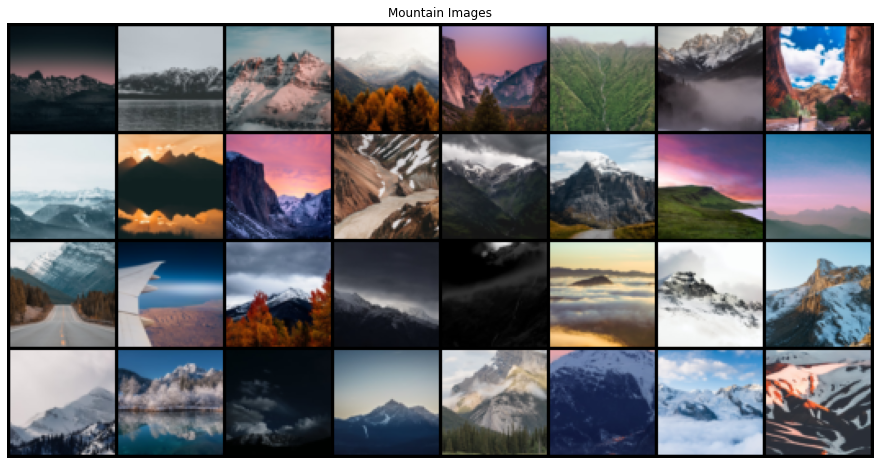

In [3]:
real_batch = next(iter(dataloader_mountains))
plt.figure(figsize=(16,8))
plt.axis("off")
plt.title("Mountain Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:32], padding=2, normalize=True).cpu(),(1,2,0)));

real_batch = next(iter(dataloader_dogs))
plt.figure(figsize=(16,8))
plt.axis("off")
plt.title("Dog Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:32], padding=2, normalize=True).cpu(),(1,2,0)));

real_batch = next(iter(dataloader_faces))
plt.figure(figsize=(16,8))
plt.axis("off")
plt.title("Face Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:32], padding=2, normalize=True).cpu(),(1,2,0)));

In [3]:
def show_results(dataloader, img_list):
    
    real_batch = next(iter(dataloader))

    plt.figure(figsize=(16, 8))
    plt.axis("off")
    plt.title("Real Images")
    plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:32], padding=5, normalize=True).cpu(),(1,2,0)))

    plt.figure(figsize=(16, 8))
    plt.axis("off")
    plt.title("Fake Images")
    plt.imshow(np.transpose(vutils.make_grid(img_list[-1][:32], padding=5, normalize=True),(1,2,0)))

In [4]:
def animate_image_list(images):
    
    plt.figure(figsize=(16, 8))
    
    for epoch, img_set in enumerate(images, 1):
        
        plt.imshow(img_set[0].permute([1,2,0]))
        plt.title(f"Epoch {epoch}")
        clear_output(wait=True)
        display(plt.gcf())
    
    plt.clf()

In [5]:
def do_run(dataloader, epochs=200, show_static_results=True, verbose=True):

    netG = Generator()
    netD = Discriminator()
    
    if cuda:
        
        netG.cuda()
        netD.cuda()
        
    img_list = main_loop(dataloader, netG, netD, epochs, verbose)
    
    if show_static_results:
    
        show_results(dataloader, img_list)
        
    else:
        
        animate_image_list(img_list)

## DCGAN

Our first GAN is a deep convolution GAN (DCGAN) as described by [Radford, Metz, and Chintala](https://arxiv.org/abs/1511.06434) in 2015, soon after the original paper by Goodfellow et al. The original GANs used multilayer perceptrons, but for machine learning on images, convolutional networks are more popular.

Radford, Metz, and Chintala were acting on the premise that while convolutional neural networks were gaining large amounts of popularity but were mostly used in supervised learning. Particularly, convolutional neural networks were primarily utilized for classification. The Goodfellow et al report inventing GANs was 2 years after the invention of AlexNet, which could be considered a landmark for when convolutional neural networks really started gaining popularity.

In addition, Radford, Metz, and Chintala consider their work some of the earliest in the application of convolutional neural networks to unsupervised learning methods, despite certainly not being the first to experiment with CNN usage in GANs. Thankfully, the concepts behind the DCGANs are more complicated and thoughtful than simply using a deep convolutional neural network as the generator and discriminator functions.

Goodfellow et al's original GAN architectures used multilayer perceptrons as these functions. These are not unlike the most basic neural networks discussed in class.

Radford, Metz, and Chintala wanted to replace these mulilayer perceptron functions with convolutional neural networks. However, they analyzed and experimented carefully to describe architectures which were suitable for training a GAN without becoming incredibly unstable.

The architecture they describe is as follows:
- Instead of pooling layers, the discriminator should use strided convolutions and the generator should use fractional-strided convolutions, which are sometimes called deconvolutions, although this term is criticized by some researchers.
- Use batch normalization to ensure layer inputs all are zero mean and unit variance.
- Deep architectures should not use densely connected layers.
- In the generator, ReLU activation should be used for all layers, except the output, which uses Tanh.
- In the discriminator, Leaky ReLU should be used for all layers.

The DCGAN has two primary issues: First, the architecture has to be fairly specific to get decent training results. The above restraints leave little room for experimentation. Furthermore, Radford, Metz, and Chintala claim that the DCGANs have stable training in *most* settings, but offer little advice as to when a DCGAN may not perform admirably and what adjustments could be made to improve this performance. The RaGANs described later, on the other hand, have stable training for almost all architectures, and it is usually not required to carefully design an architecture that suits the dataset. In addition, although it may not have been necessarily awful at the time, the training time for this type of GAN is not great compared to modern GANs.

The following code is adapted from example code found in the [main pytorch repository](https://github.com/pytorch/examples/blob/master/dcgan/main.py).

In [20]:
class Generator(nn.Module):
    
    def __init__(self):
        
        super(Generator, self).__init__()
        
        self.ngpu = int(cuda)
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        
        return self.main(input)

In [21]:
class Discriminator(nn.Module):
    
    def __init__(self):
        
        super(Discriminator, self).__init__()
        
        self.ngpu = int(cuda)
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        
        return self.main(input)

In [34]:
def main_loop(dataloader, netG, netD, epochs, verbose):
    
    criterion = nn.BCELoss()

    real_label = 1
    fake_label = 0

    optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

    # Training Loop
    
    device = 'cuda:0' if cuda else 'cpu'
    
    start_time = time.time()

    img_list = []
    iters = 0

    for epoch in range(epochs):
                
        for i, data in enumerate(dataloader, 0):
            
            netD.zero_grad()
            real_cpu = data[0].to(device)
            b_size = real_cpu.size(0)
            label = torch.full((b_size,), real_label, device=device)
            output = netD(real_cpu).view(-1)
            errD_real = criterion(output, label)
            errD_real.backward()
            
            fake = netG(torch.randn(b_size, 100, 1, 1, device=device))
            label.fill_(fake_label)
            
            output = netD(fake.detach()).view(-1)
            errD_fake = criterion(output, label)
            errD_fake.backward()
            errD = errD_real + errD_fake
            optimizerD.step()
            
            netG.zero_grad()
            label.fill_(real_label)
            output = netD(fake).view(-1)
            errG = criterion(output, label)
            errG.backward()
            optimizerG.step()

        if verbose:
            
            elapsed_time = time.time() - start_time
            estimated_time = (elapsed_time / (epoch + 1)) * (epochs - epoch + 1)
            print("Epoch %d/%d --- %.2fs elapsed --- %.2fs remaining" % (epoch + 1, epochs, elapsed_time, estimated_time), end='\r')
                
        img_list.append(fake.cpu().detach())
            
    return img_list

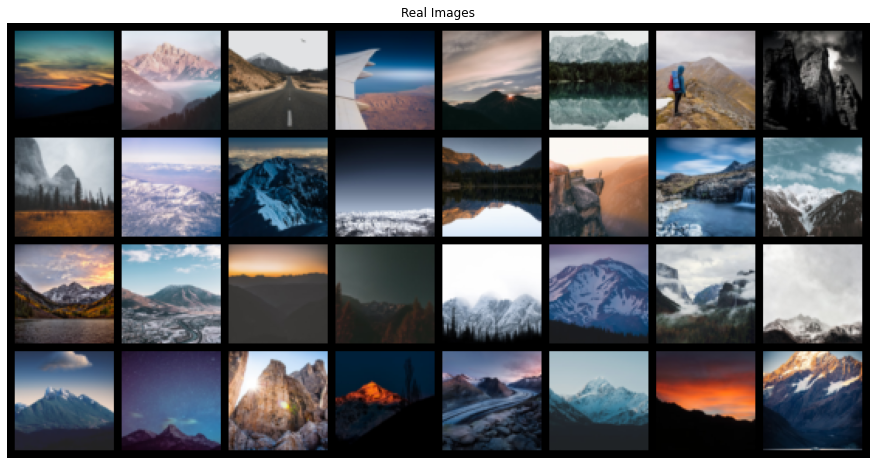

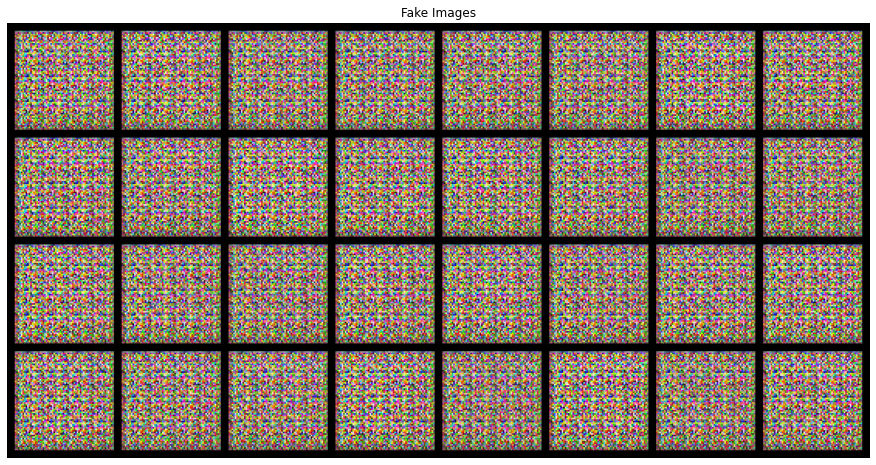

In [35]:
do_run(dataloader_mountains, epochs=1)

In [ ]:
do_run(dataloader_dogs, epochs=100)

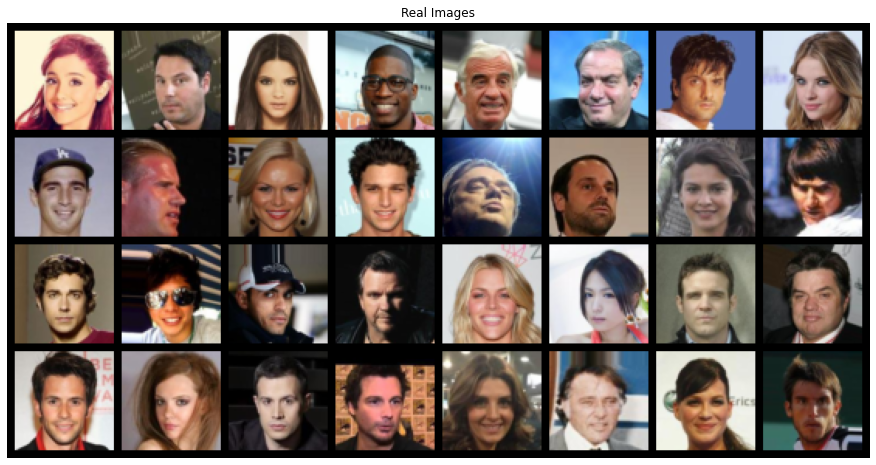

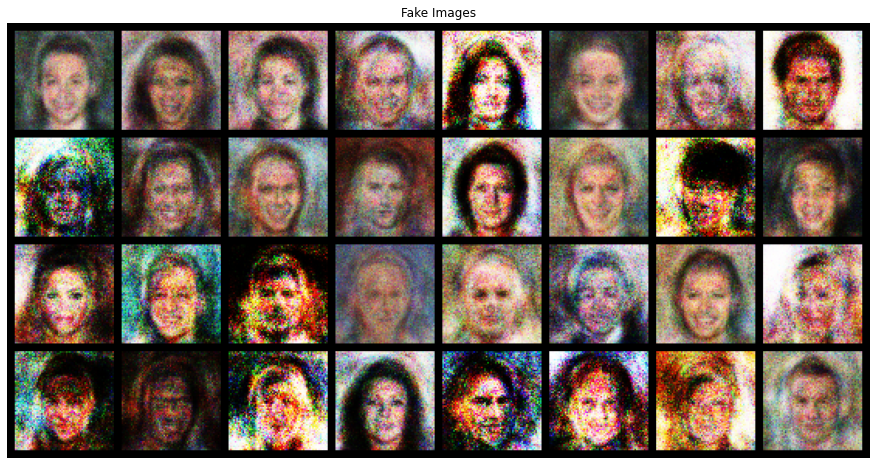

In [12]:
do_run(dataloader_faces, epochs=50)

### DCGAN Results

The DCGAN produced some expected results. For the first two datasets, the generator could not produce anything much better than noise which vaguely resembles the data. However, if questioned out of context, people are not likely to guess what the images are, much more so on the mountain images with no foreground object.

On the CelebA dataset, it performed much better. Although we trained this dataset for half the epochs, you can see that it took much longer due to the abundance of data. As a result, the networks trained further and performed better. Although the images are not perfect, they are certainly recognizable as faces. Perhaps there is a psychological bias due to the human's tendency to see faces in objects. The generated faces have varying degrees of quality- some are incredibly creepy, but there are also some which you could almost imagine being an obsfucated image of a person you know.

In attempts to get the first datasets working better, we tried to train for more epochs. However, we encountered an interesting but well known issue: mode collapse. The generator, instead of learning how to produce a variety of images which resemble training data, realizes that by producing one very good image over and over, it can trick the discriminator nearly every time. The generator essentially ignores the input and just produces one image. The discriminator realizes what the generator is doing, and as a result, starts to reject only that image, and thus gets a very high accuracy. The generator then switches to a new image, but since the discriminator only rejects the image the generator used to produce, the new image is always accepted by the discriminator, and may not even resemble the training data. This cycle continues.

## Wasserstein GAN

The Wasserstein GAN (WGAN) proposed by [Arjovsky, Chintala, and Bottou](
https://arxiv.org/abs/1701.07875) is a model that improves learning stability and helps get rid of problems like mode collapse, which we experienced with our first GAN model. There are several additional benefits to WGANs as described in the paper.

The Wasserstein GAN improves on Goodfellow et al's generative adversarial model by adjusting the loss function based on a redefinition of distance and divergence between two images. This redefinition of distance has a strong impact on the convergence of probability distribution sequences. This modification was motivated by the consideration that most GANs attempt to make use of low dimension input vectors to represent high dimensionality images via a learned probability density. The typical solution to this problem is to introduce a noise component, which, unsurprisingly, can result in the images produced by the generator to be noisy.

The Wassersteing GAN disregards the concept of probability density altogether, and instead uses networks to generate samples from a distribution with the claim that the probability distribution learned by the discriminator can be learned without probabiity density and thus the noise issue can be avoided altogether. Generating samples and using a different definition of distance between images can help reduce noise in the resultant images. Specifically, the distance used is the Earth-Mover distance or Wasserstein-1 distance, hence the name Wasserstein GAN.

The WGAN as well as the Relativistic GAN later are both based on and adapted from implementations by [Erik Linder-Noren](https://github.com/eriklindernoren/PyTorch-GAN).

In [13]:
class Generator(nn.Module):
    
    def __init__(self):
        
        super(Generator, self).__init__()
        
        def block(in_feat, out_feat, normalize=True):
            
            layers = [nn.Linear(in_feat, out_feat)]
            
            if normalize:
                
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(100, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        
        img = self.model(z)
        img = img.view(img.shape[0], * img_shape)
        return img

In [14]:
class Discriminator(nn.Module):
    
    def __init__(self):
        
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity

In [15]:
def compute_gradient_penalty(D, real_samples, fake_samples):

    alpha = Tensor(np.random.random((real_samples.size(0), 1, 1, 1)))
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)
    d_interpolates = D(interpolates)
    fake = autograd.Variable(Tensor(real_samples.shape[0], 1).fill_(1.0), requires_grad=False)
    gradients = autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    
    return gradient_penalty

In [16]:
def main_loop(dataloader, netG, netD, epochs, verbose):
        
    optimizer_G = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

    img_list = []
    start_time = time.time()

    for epoch in range(epochs):
    
        for i, (imgs, _) in enumerate(dataloader):

            real_imgs = autograd.Variable(imgs.type(Tensor))

            optimizer_D.zero_grad()

            z = autograd.Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], 100))))

            fake_imgs = netG(z)

            real_validity = netD(real_imgs)
            fake_validity = netD(fake_imgs)
            
            gradient_penalty = compute_gradient_penalty(netD, real_imgs.data, fake_imgs.data)

            d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) + 10 * gradient_penalty
            d_loss.backward()
            optimizer_D.step()

            optimizer_G.zero_grad()

            if i % 5 == 0:

                fake_imgs = netG(z)

                fake_validity = netD(fake_imgs)
                g_loss = -torch.mean(fake_validity)

                g_loss.backward()
                optimizer_G.step()

        if verbose:
            
            elapsed_time = time.time() - start_time
            estimated_time = (elapsed_time / (epoch + 1)) * (epochs - epoch + 1)
            print("Epoch %d/%d --- %.2fs elapsed --- %.2fs remaining" % (epoch + 1, epochs, elapsed_time, estimated_time), end='\r')
            
        with torch.no_grad():

            fake = netG(z).detach().cpu()
                
        img_list.append(fake)
                            
    return img_list

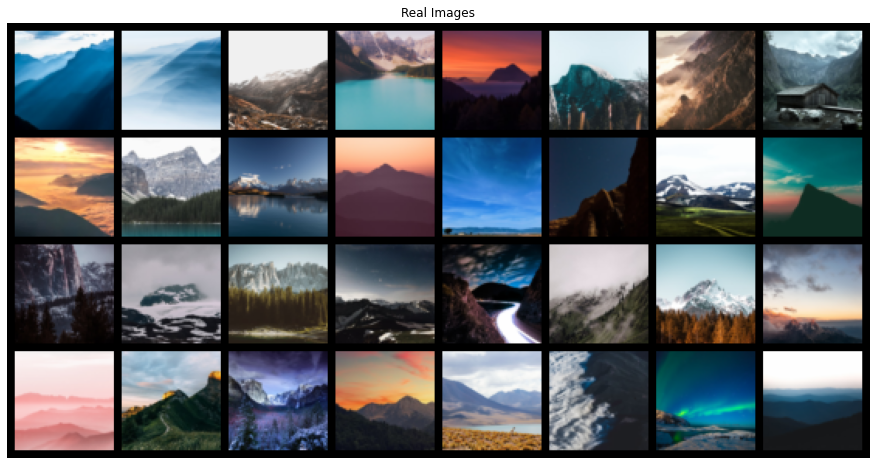

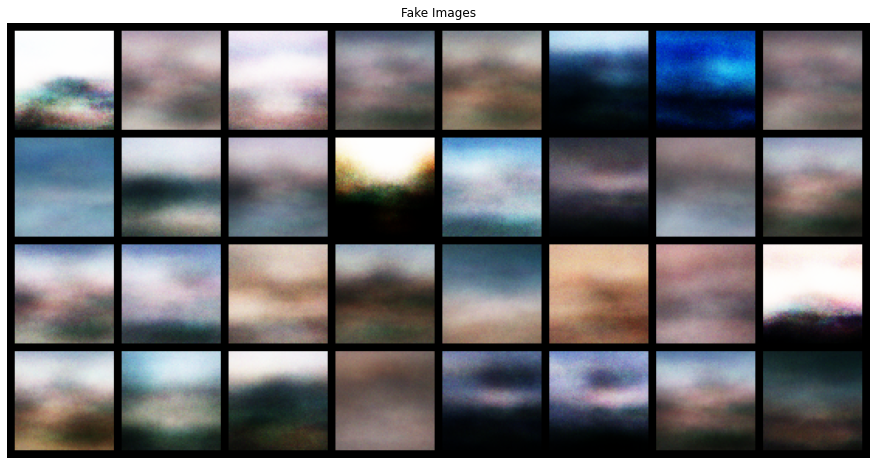

In [17]:
do_run(dataloader_mountains, epochs=100)

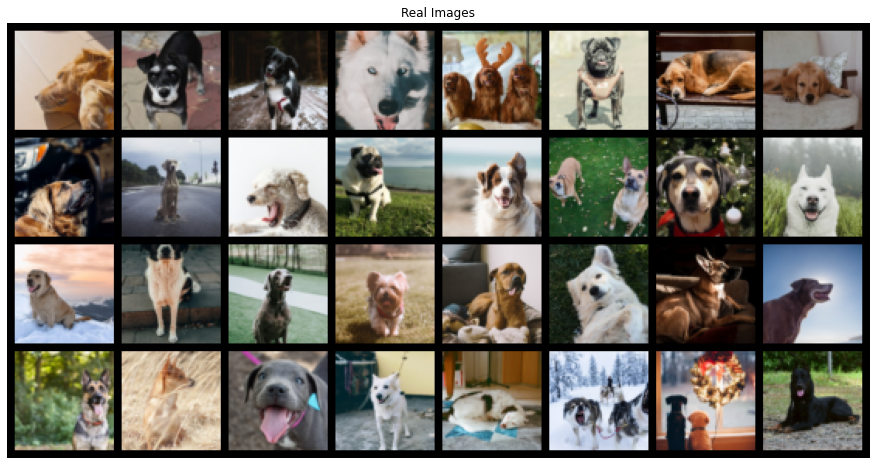

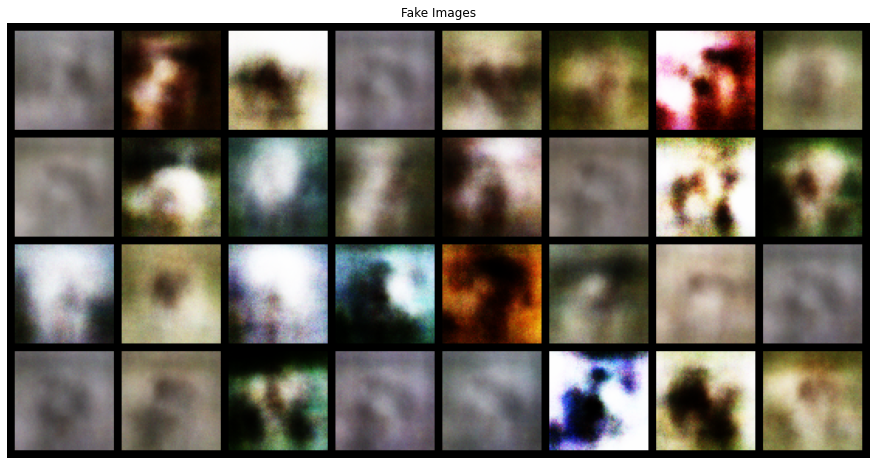

In [18]:
do_run(dataloader_dogs, epochs=100)

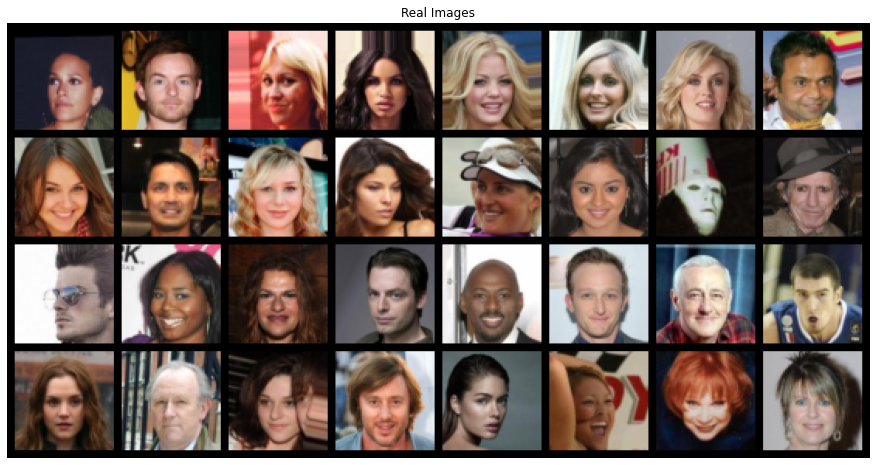

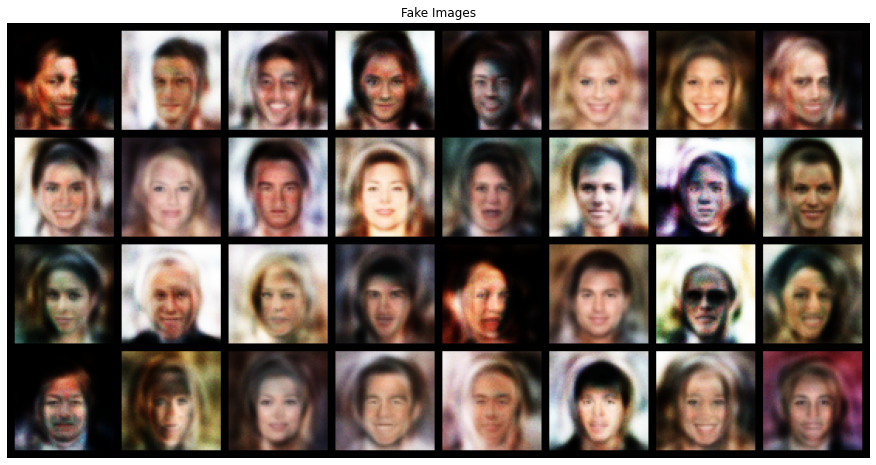

In [19]:
do_run(dataloader_faces, epochs=50)

### WGAN Results

The results for the WGAN are similar but different in very interesting ways. Whereas the images produced by the DCGANs were noisy, these images are instead blurry. For the CelebA dataset, the network seemed to be getting very close to producing high quality images. More interstingly, it appears to have focused on learning the important features of the face and ignoring the background- while the generated faces themselves are higher detail than the DCGAN models, the background has lost lots of detail.

## Relativistic Average GAN

The Relativistic Average GAN (RaGAN), proposed by [Jolicoeur-Martineau](https://arxiv.org/abs/1807.00734) in 2018, is a significantly more stable model that can generate higher quality data samples than their non-relativistic counterparts. Jolicoeur-Martineau argues that the generator should not only maximize the probability that the generated data is real, but should also minimize the probability that real data is real. To do this, the discriminator is trained to estimate the probability that some real data is more realistic than generated data. She finds that relativstic models train much quicker and produce higher quality images from much smaller datasets such as our mountain and dog datasets.

In [20]:
 class Generator(nn.Module):
    
    def __init__(self):
        
        super(Generator, self).__init__()

        self.init_size = 64 // 4
        self.l1 = nn.Sequential(nn.Linear(100, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 3, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        
        return img

In [21]:
class Discriminator(nn.Module):
    
    def __init__(self):
        
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1), nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            
            if bn:
                
                block.append(nn.BatchNorm2d(out_filters, 0.8))
           
            return block

        self.model = nn.Sequential(
            *discriminator_block(3, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        ds_size = 64 // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, 1))

    def forward(self, img):
        
        out = self.model(img)
        out = out.view(out.shape[0], -1)
        validity = self.adv_layer(out)

        return validity

In [22]:
def main_loop(dataloader, netG, netD, epochs, verbose):

    adversarial_loss = torch.nn.BCEWithLogitsLoss()

    if cuda:
        
        adversarial_loss.cuda()
        
    optimizer_G = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

    img_list = []
    start_time = time.time()
    
    for epoch in range(epochs):
        
        for i, (imgs, _) in enumerate(dataloader):

            valid = autograd.Variable(Tensor(imgs.shape[0], 1).fill_(1.0), requires_grad=False)
            fake = autograd.Variable(Tensor(imgs.shape[0], 1).fill_(0.0), requires_grad=False)

            real_imgs = autograd.Variable(imgs.type(Tensor))

            optimizer_G.zero_grad()

            z = autograd.Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], 100))))

            gen_imgs = netG(z)

            real_pred = netD(real_imgs).detach()
            fake_pred = netD(gen_imgs)

            g_loss = adversarial_loss(netD(gen_imgs), valid)

            g_loss.backward()
            optimizer_G.step()

            optimizer_D.zero_grad()

            real_pred = netD(real_imgs)
            fake_pred = netD(gen_imgs.detach())

            real_loss = adversarial_loss(real_pred - fake_pred.mean(0, keepdim=True), valid)
            fake_loss = adversarial_loss(fake_pred - real_pred.mean(0, keepdim=True), fake)

            d_loss = (real_loss + fake_loss) / 2

            d_loss.backward()
            optimizer_D.step()

        if verbose:
            
            elapsed_time = time.time() - start_time
            estimated_time = (elapsed_time / (epoch + 1)) * (epochs - epoch + 1)
            print("Epoch %d/%d --- %.2fs elapsed --- %.2fs remaining" % (epoch + 1, epochs, elapsed_time, estimated_time), end='\r')
                             
        with torch.no_grad():

            fake = netG(z).detach().cpu()
                
        img_list.append(fake)
                            
    return img_list

In [ ]:
do_run(dataloader_mountains, epochs=100)

In [ ]:
do_run(dataloader_dogs, epochs=100)

In [ ]:
do_run(dataloader_faces, epochs=50)

### RaGANs Results

Ehh... TBD.

## Member Contributions

The following is a description of the contributions of each member to the overall project. Each team member completed the code for one of the GAN model types, so we all had experience working with the GAN code and structure using PyTorch and autograd. However, each team member has studied and understands the ideas behind each GAN model. Beyond this contribution, we did more of a divide and conquer strategy on the work that any of us could have accomplished.

##### Max Rosoff 

Max contributed the initial implementation of the DCGAN and the dataloader code for loading the data in and being able to use it in the GANs. This code is a modified version of tutorial code found in the pytorch examples in the pytorch github repository. Max also wrote the `do_run` function for use across all the GANs and prepared the CelebA dataset for use in our project. Max has the strongest computer available out of all of us, so he took the responsibility of running the notebook so that it would take the shortest possible time. He also contributed to the write-up for the project.

##### Kacey Schulz

Kacey contributed the implementation of WGANs, modified to work with the original code provided by Max. He also provided the matplotlib functions `show_results` and `animate_image_list` for displaying images, which are also based on code from the pytorch repository. Kacey also contributed a large majority of the write-up for the project.

##### Ben Gillett

Ben contributed the implementation of the RaGAN, and was responsible for gathering the datasets we worked on excluding CelebA. He wrote the code for gathering data from the internet based on various parameters we wanted for our GANs. Ben also contributed to the write-up for the project.

### Github

This notebook, as well as the project proposal notebook and the source datasets can be found/downloaded from [this Github repo](https://github.com/mrrosoff/Image-GAN).

In [36]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Image-GAN.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

c:\users\kacey\appdata\local\programs\python\python37\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Word count for file Image-GAN.ipynb is 3173


## References

[Ian J. Goodfellow and Jean Pouget-Abadie and Mehdi Mirza and Bing Xu and David Warde-Farley and Sherjil Ozair and Aaron Courville and Yoshua Bengio. Generative Adversarial Networks. *arXiv preprint arXiv:1406.2661*, 2014.](https://arxiv.org/abs/1406.2661)

[Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou. Deep Learning Face Attributes in the Wild. Dec, 2015.](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

[Aditya Khosla, Nityananda Jayadevaprakash, Bangpeng Yao and Li Fei-Fei. Novel dataset for Fine-Grained Image Categorization. First Workshop on Fine-Grained Visual Categorization (FGVC), IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2011.](http://vision.stanford.edu/aditya86/ImageNetDogs/main.html)

[Alec Radford and Luke Metz and Soumith Chintala. Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks. *arXiv preprint arXiv:1511.06434, 2015.](https://arxiv.org/abs/1511.06434)

[Erik Linder-Noren. PyTorch implementations of Generative Adversarial Networks.](https://github.com/eriklindernoren/PyTorch-GAN)

[Martin Arjovsky and Soumith Chintala and Léon Bottou. Wasserstein GAN. *arXiv preprint arXiv:1701.07875*, 2017](https://arxiv.org/abs/1701.07875)

[Ishaan Gulrajani and Faruk Ahmed and Martin Arjovsky and Vincent Dumoulin and Aaron Courville. Improved Training of Wasserstein GANs. *arXiv preprint arXiv:1704.00028*, 2017](https://arxiv.org/abs/1704.00028)

[Alexia Jolicoeur-Martineau. The relativistic discriminator: a key element missing from standard GAN. *arXiv preprint arXiv:1807.00734*, 2018](https://arxiv.org/abs/1807.00734)